In [1]:
# project: p2
# submitter: yzhang2232
# partner: none
# hours: 4

In [2]:
import loans
import search
import matplotlib.pyplot as plt
import time

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
bank = loans.Bank("First Home Bank")

In [5]:
#q1
sum_ir = 0
ratelen = 0
for loan in bank:
    if loan.interest_rate != -1:
        sum_ir += loan.interest_rate
        ratelen += 1
sum_ir / ratelen

2.962962962962963

In [6]:
#q2
totalapp = 0
for loan in bank:
    totalapp += len(loan.applicants)
totalapp / len(bank)

1.5777777777777777

In [7]:
#q3
age_dist = {}
for loan in bank:
    for app in loan.applicants:
        if not app.age in age_dist:
            age_dist[app.age] = 0
        age_dist[app.age] += 1
age_dist

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [8]:
#q4
loantree = search.BST()
for loan in bank:
    loantree.add(loan.interest_rate, loan)
len(loantree[-1])

18

In [9]:
#q5
def treeh(rootnode):
    if rootnode == None:
        return 0
    lefth = treeh(rootnode.left)
    righth = treeh(rootnode.right)
    if lefth > righth:
        return lefth + 1
    else:
        return righth + 1
treeh(loantree.root)

9

In [10]:
uwcu = loans.Bank("University of Wisconsin Credit Union")

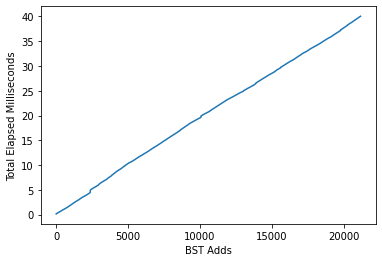

In [11]:
#q6
t0 = time.time()
uwtree = search.BST()
numadd = []
timepass = []
for i in range(len(uwcu)):
    uwtree.add(uwcu[i].interest_rate, uwcu[i])
    numadd.append(i+1)
    t1 = time.time()
    timepass.append((t1-t0) * 1000)
plt.plot(numadd,timepass)
plt.xlabel("BST Adds")
plt.ylabel("Total Elapsed Milliseconds")
plt.show()

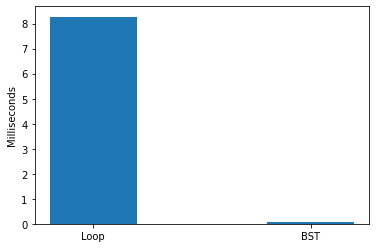

In [12]:
#q7
t0 = time.time()
total = 0
for loan in uwcu:
    if loan.interest_rate == -1:
        total += 1
t1 = time.time()
looptime = (t1-t0) * 1000

t2 = time.time()
len(uwtree[-1])
t3 = time.time()
trtime = (t3-t2) * 1000

plt.bar(["Loop","BST"], [looptime, trtime], width = 0.4)
plt.ylabel("Milliseconds")
plt.show()

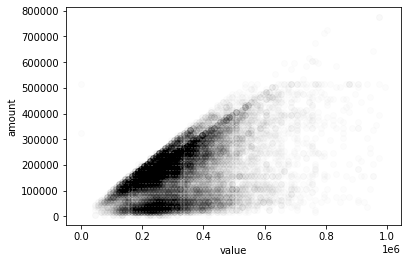

In [13]:
#q8
proval = []
loanam = []
for loan in uwcu:
    if loan.property_value <= 1000000 and loan.interest_rate != -1:
        proval.append(loan.property_value)
        loanam.append(loan.loan_amount)
plt.scatter(proval, loanam, color = "black", alpha = 0.01)
plt.xlabel("value")
plt.ylabel("amount")
plt.show()

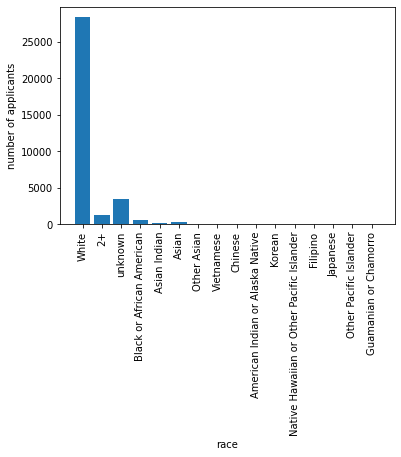

In [14]:
#q9
racedict = {}
for loan in uwcu:
    for i in range(len(loan.applicants)):
        if len(loan.applicants[i].race) > 1:
            if not "2+" in racedict:
                racedict["2+"] = 0
            racedict["2+"] += 1
        elif len(loan.applicants[i].race) == 0:
            if not "unknown" in racedict:
                racedict["unknown"] = 0
            racedict["unknown"] += 1
        else:
            race = list(loan.applicants[i].race)[0]
            if not race in racedict:
                racedict[race] = 0
            racedict[race] += 1
key = list(racedict.keys())
value = list(racedict.values())
plt.bar(key,value)
plt.xticks(rotation = 90)
plt.xlabel("race")
plt.ylabel("number of applicants")
plt.show()

In [15]:
#q10
def node_count(node):
    if node == None:
        return 0
    return 1 + node_count(node.left) + node_count(node.right)

node_count(uwtree.root)

32